In [3]:
cd '/Users/alclark/Documents/GitHub/Matplotlib-for-Storytellers/figures/mathplots' 

/Users/alclark/Documents/GitHub/Matplotlib-for-Storytellers/figures/mathplots


In [4]:
import nbformat
#prose_img_path = 'figures/proseplots/'

In [5]:
def savepy(filename, source: str = None, cell_no: int = None):
    '''
    Save python file from string. Assumes the working directory is the root project folder.
    '''
    filename = filename + '.py'
    path = '../../python/'

    current_cell = get_ipython().execution_count
    
    if source is None:
        if cell_no is None:
            cell_no = current_cell - 2 # - 1 for 0-based -1 again for previous
            #raise Exception("need source or cell number.")
        # get cell source
        tmp = nbformat.read(path + 'Figure-Dev.ipynb', as_version=4)
        cell = tmp.cells[cell_no]
        source = cell['source']
        
        # truncate source
        trunc_word = '#truncate'
        if trunc_word in source:
            source = source[:source.index(trunc_word)]
            
        # strip white space
        lines = source.splitlines()
        for i in range(len(lines)):
            lines[i] = lines[i].rstrip()
        source = '\n'.join(lines)
        
    with open(path + filename, 'w') as f:
        f.write(source)

In [6]:
import numpy as np
import pandas as pd
import math
from itertools import combinations
from itertools import product
from sklearn.datasets import load_iris 

# matplotlib specific
import matplotlib as mpl
import matplotlib.pyplot as plt

# For Special Topics
# import ternary # requires install
# from ternary.helpers import simplex_iterator
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from scipy import stats

# Made redundant in the text
from matplotlib import colors
from matplotlib.patches import ConnectionPatch
from matplotlib.patches import Rectangle
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import colorConverter
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.dates as mdates
from matplotlib import font_manager

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


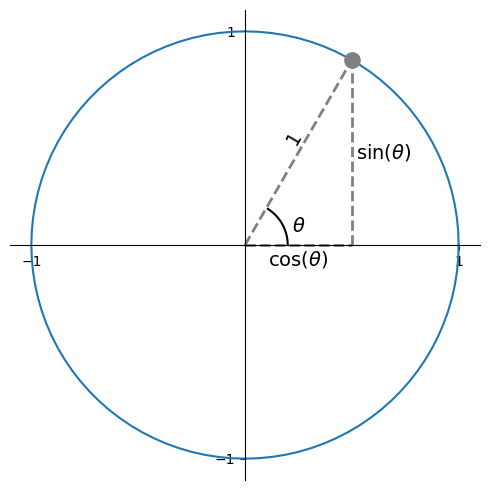

In [11]:
angles = np.linspace(0, 2*np.pi, 101)
x = np.cos(angles)
y = np.sin(angles)

fig, ax = plt.figure(figsize = (5,5)), plt.axes()
ax.set_aspect('equal')

# Make circle
ax.plot(x,y)
    
# Plot example right triangle 
angle = np.pi/3

# make hypotenuse
ax.plot([0,np.cos(angle)], [0,np.sin(angle)], 
        linestyle = 'dashed', color ='gray', linewidth = 2)#

# mark point on circle
ax.plot([np.cos(angle)], [np.sin(angle)], 
        marker = 'o', color ='gray', markersize = 11) 

# dashed lines for opposite and adjacent
ax.plot([0,np.cos(angle)], [0,0], 
        linestyle = 'dashed', color ='gray', linewidth = 2)
ax.plot([np.cos(angle),np.cos(angle)], [0,np.sin(angle)], 
        linestyle = 'dashed', color ='gray', linewidth = 2)

# Triangle side lengths
fontsize = 14
ax.text(0.5*np.cos(angle) - .02, 0.5*np.sin(angle)+.02, 
        '1', rotation = math.degrees(angle), ha = 'center', va = 'bottom', size = fontsize)
ax.text(0.5*np.cos(angle), -.02, r"$\cos(\theta)$", 
        rotation = 0, ha = 'center', va = 'top', size = fontsize)
ax.text(np.cos(angle) + .02, 0.5*np.sin(angle), r"$\sin(\theta)$", 
        rotation = 0, ha = 'left', va = 'center', size = fontsize)

    
# make small arc and mark angle
x = np.cos(angles[angles<= angle])
y = np.sin(angles[angles<= angle])
ax.plot(0.2*x,0.2*y, color = 'black')
ax.text(0.2*np.cos(np.pi/10), 0.2*np.sin(np.pi/10),
        r" $\theta$", size = 14)

# clean appearance   
%run ../../python/spine-mod.py
ax.set_xticks([-1, 1])
ax.set_yticks([-1, 1])
#truncate
plt.tight_layout()
plt.savefig("unit-circle.pdf")

In [ ]:
savepy('unit-circle')

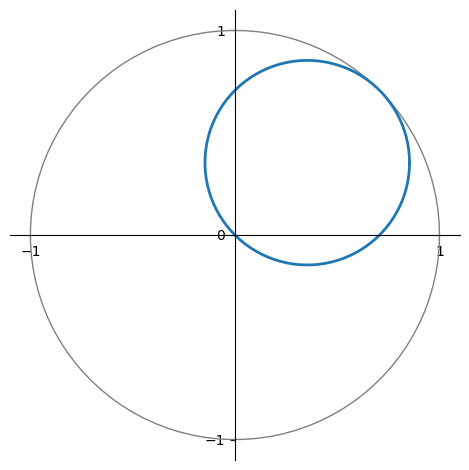

In [13]:
angles = np.linspace(0, 2*np.pi, 100)

fig, ax = plt.figure(), plt.axes()
ax.set_aspect('equal')

# Unit Circle
x = np.cos(angles)
y = np.sin(angles)
ax.plot(x, y, color = 'gray', linewidth = 1)

# Shifted
new_radius = 0.5
new_center = np.cos(np.pi/4)/2, np.sin(np.pi/4)/2
shift_x = new_radius*x + new_center[0]
shift_y = new_radius*y + new_center[1]
ax.plot(shift_x, shift_y, linewidth = 2)

%run ../../python/spine-mod.py

ax.set_xticks([-1, 1])
ax.set_yticks([-1, 0, 1])
#truncate
plt.tight_layout()
plt.savefig("unit-circle-shift.pdf")

In [ ]:
savepy('unit-circle-shift')

In [14]:
theta = np.pi / 4
rotation_matrix = np.matrix([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

x_scale = 0.5
x_stretch = np.matrix([[x_scale, 0], [0, 1]])

y_scale = 2
y_stretch = np.matrix([[1, 0], [0, y_scale]])

transformation = rotation_matrix * y_stretch * x_stretch

In [15]:
savepy('tform-matrix')

matrix([[ 0.35355339, -1.41421356],
        [ 0.35355339,  1.41421356]])

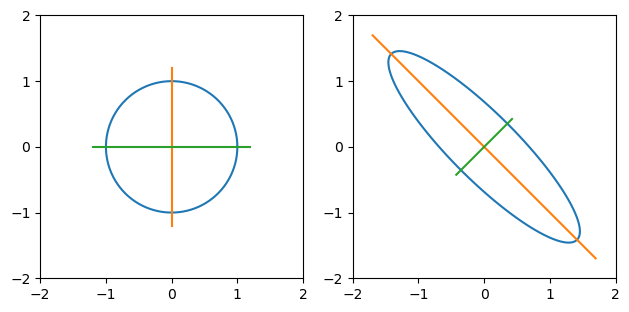

In [17]:
# Create a circle of points
angles = np.linspace(0, 2*np.pi, 100)
x_vals = np.cos(angles)
y_vals = np.sin(angles)

# Begin plot
fig, ax = plt.subplots(1,2)

# simplify axes names
ax0, ax1 = ax[0], ax[1]

# Plot a circle
ax0.plot(x_vals, y_vals)

# Mark the y and x directions/axes
# vertical axis
height = 1.2
p1 = np.array([0,-height])
p2 = np.array([0,height])
points = [p1,p2]
x_vertical = [p[0] for p in points]
y_vertical = [p[1] for p in points]
ax0.plot(x_vertical, y_vertical)

# horizontal axis
width = height
p1 = np.array([height,0])
p2 = np.array([-height,0])
points = [p1,p2]
x_horiz = [p[0] for p in points]
y_horiz = [p[1] for p in points]
ax0.plot(x_horiz, y_horiz)

# Make Ellipse
new_points = [transformation * np.matrix(p).T for p in zip(x_vals,y_vals)]

new_x = [np.array(x).flatten()[0] for x in new_points]
new_y = [np.array(x).flatten()[1] for x in new_points]

# new vertical axis
new_vertical = [transformation * np.matrix(p).T for p in zip(x_vertical, y_vertical)]
new_x_vertical = [np.array(x).flatten()[0] for x in new_vertical]
new_y_vertical = [np.array(x).flatten()[1] for x in new_vertical]

# new horizontal axis
new_horiz = [transformation * np.matrix(p).T for p in zip(x_horiz, y_horiz)]
new_x_horiz = [np.array(x).flatten()[0] for x in new_horiz]
new_y_horiz = [np.array(x).flatten()[1] for x in new_horiz]

# Plot ellipse etc
ax1.plot(new_x, new_y)
ax1.plot(new_x_vertical, new_y_vertical)
ax1.plot(new_x_horiz, new_y_horiz)

# Change axes appearance
args = -2,2
for ax_ in ax0, ax1:
    ax_.set_xlim(args)
    ax_.set_ylim(args)
    ax_.set_xticks(np.linspace(*args,5))
    ax_.set_yticks(np.linspace(*args,5))
ax0.set_aspect('equal')
ax1.set_aspect('equal')
#truncate
plt.tight_layout()
plt.savefig("ellipse-tform.pdf")

In [ ]:
savepy('ellipse-tform')

In [18]:
## Right triangles

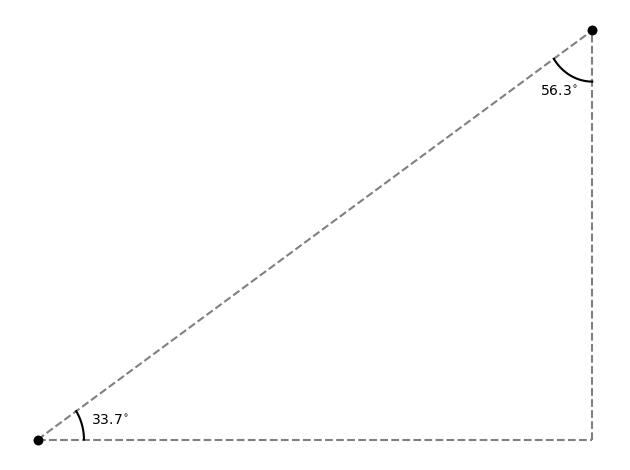

In [80]:
fig, ax = plt.figure(), plt.axes()

a = (1,2)
b = (7,6)

# rise over run
slope = (a[1] - b[1]) / (a[0] - b[0])
angle = math.atan(slope) # radians
degrees = math.degrees(angle)

top_angle = math

## add angle semi-circle
x = np.linspace(0, angle, 100)
ax.plot(0.5 * np.cos(x) + a[0],
         0.5 * np.sin(x) + a[1],
         color = 'black')
ax.text(0.5*np.cos(angle/2) + 1.1, 0.5*np.sin(angle/2) + 2,
        s = r"${:.1f}".format(degrees) + r"^{\circ}$")

# top slope measured relative to a 90-deg rotation
top_slope = (b[0]-a[0])/(b[1]-a[1])
top_angle = math.atan(top_slope)
x = np.linspace(1.5*np.pi, 1.5*np.pi - top_angle, 100)
ax.plot(0.5*np.cos(x) + b[0],
         0.5*np.sin(x) + b[1],
         color = 'black')
label_angle = 1.5*np.pi - top_angle/2
ax.text(0.5*np.cos(label_angle) + b[0] - 0.13, 0.5*np.sin(label_angle) + b[1] - 0.2,
        s = r"${:.1f}".format(math.degrees(top_angle)) + r"^{\circ}$",
       ha = 'center')


# points on left and top
ax.plot([a[0], b[0]], [a[1], b[1]], linestyle = '', marker = 'o', color = 'black')

# make a right triangle
ax.plot([a[0], b[0]], [a[1], b[1]], linestyle = 'dashed', marker = 'o', color = 'gray', zorder = -1)
ax.plot([a[0], b[0]], [a[1], a[1]], linestyle = 'dashed', color = 'gray', zorder = -1)
ax.plot([b[0], b[0]], [a[1], b[1]], linestyle = 'dashed', color = 'gray', zorder = -1)
ax.axis('off')
#truncate
plt.tight_layout()
plt.savefig("r-triangle.pdf")

In [20]:
savepy('r-triangle')

0.5880026035475675

In [81]:
## sloping text

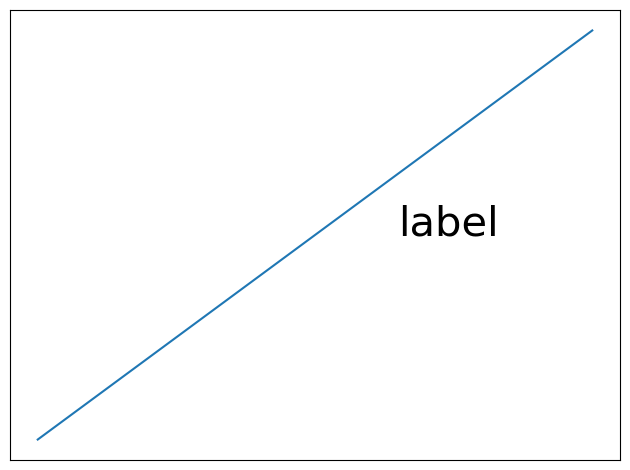

In [83]:
plt.plot([0,1], [0,1])
plt.text(0.65, 0.5,
         s = 'label',
         size = 30) 

ax = plt.gca()
# Cosmetics
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
#truncate
plt.tight_layout()
plt.savefig("no-slope.pdf")

In [ ]:
savepy('no-slope')

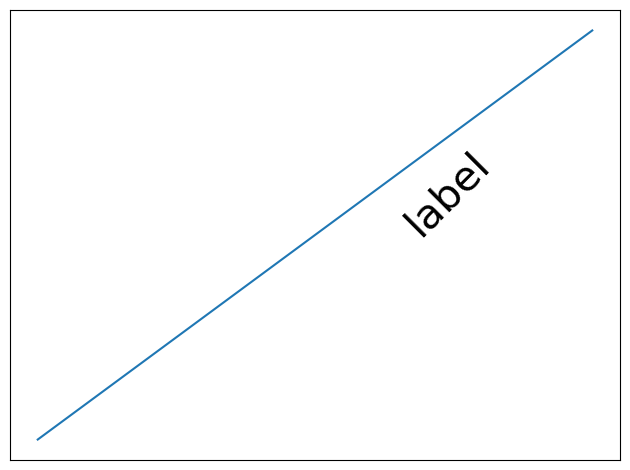

In [92]:
plt.plot([0,1], [0,1])
plt.text(0.65, 0.5,
         s = 'label',
         rotation = 45,
         size = 30) 
# Cosmetics
ax = plt.gca()
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
#truncate
plt.tight_layout()
plt.savefig("bad-slope.pdf")

45.0 36.692053065916376


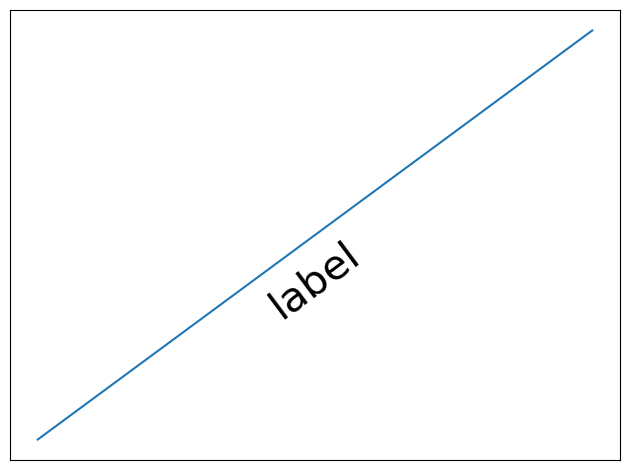

In [95]:
x1, y1 = 0, 0
x2, y2 = 1, 1
x = (x1, x2)
y = (y1, y2)

# plot
fig, ax = plt.figure(), plt.axes()
ax.plot(x,y)

# Find angles and then insert text
slope = (y2 - y1) / (x2 - x1)
true_angle = math.degrees(math.atan(slope))
dummy_array = np.array([[0,0]]) # doesn't matter what pair you use. 
plot_angle = ax.transData.transform_angles(
                            np.array((true_angle,)),
                            dummy_array)[0]

ax.text(np.mean(x), np.mean(y),
        s = 'label',
        rotation = plot_angle,
        fontsize = 30,
        va = 'top',
        ha = 'center')

ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
print(true_angle, plot_angle)
#truncate
plt.tight_layout()
plt.savefig("slope-label.pdf")

In [ ]:
savepy('slope-label')